# Play with migration

Startup run in 5.537939071655273 secs.


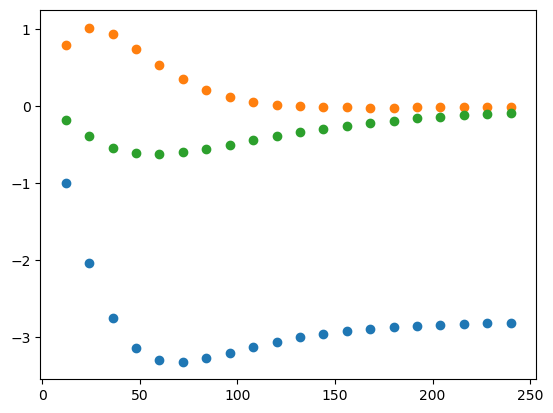

false

In [1]:
using NBInclude
_VERS_ = :base 
@nbinclude("startup.ipynb")

dir_gra = joinpath(pwd(),"../graphs/migration")
_tosave = false

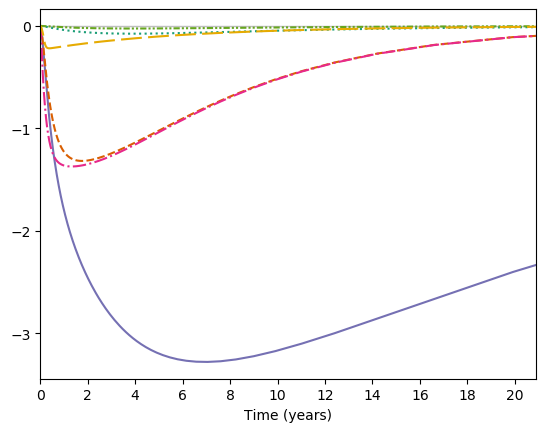

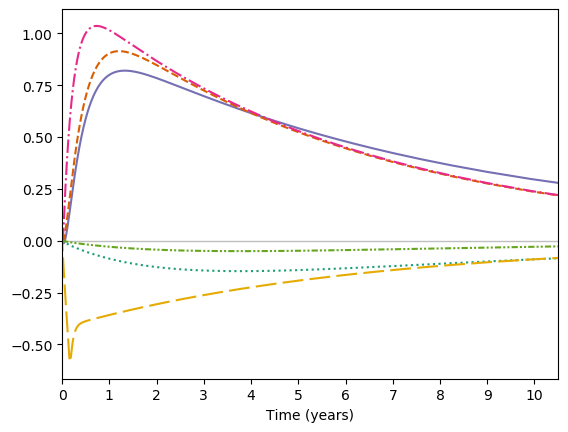

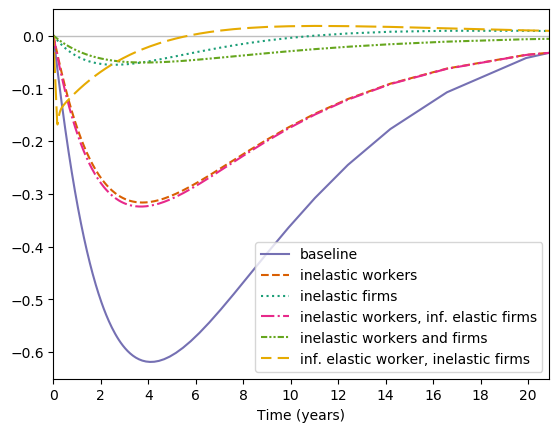

()

In [2]:
p_noW = StrucPar_migr(0., p.nuPsi, p)  ## zero elasticity workers
p_noF = StrucPar_migr(p.nuPhi, 0., p)  ## zero elasticity firms
p_dmp = StrucPar_migr(0., 10000., p)
p_no = StrucPar_migr(0., 0., p)
p1 = StrucPar_migr(10000., 0., p)

tab =[]
for myp in [p, p_noW, p_noF, p_dmp, p_no, p1]
    mysimu = simulate(240, simpar, myp)
    push!(tab, (myp,mysimu))
end

mylabel = ["baseline", "inelastic workers", "inelastic firms", 
    "inelastic workers, inf. elastic firms", 
    "inelastic workers and firms", "inf. elastic worker, inelastic firms"]

### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.m ./myp.m_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(1) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((myp.l_star-myp.m_star)/(myp.l_star)) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(1) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate.png")) : ()



### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (myp.l_star/myp.d_star) ) .* 100 ,  
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate.png")) : ()

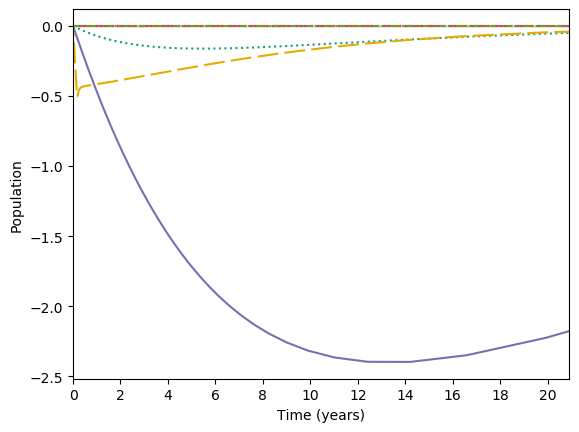

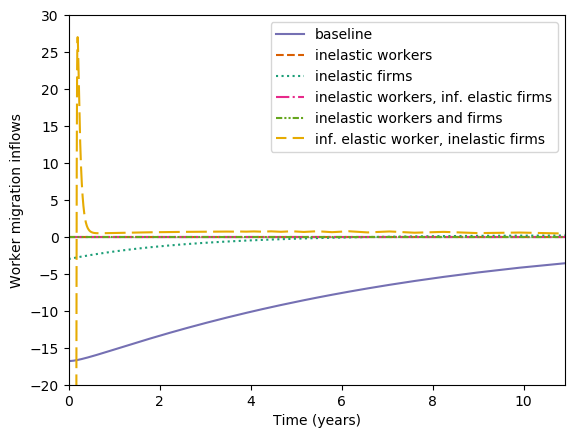

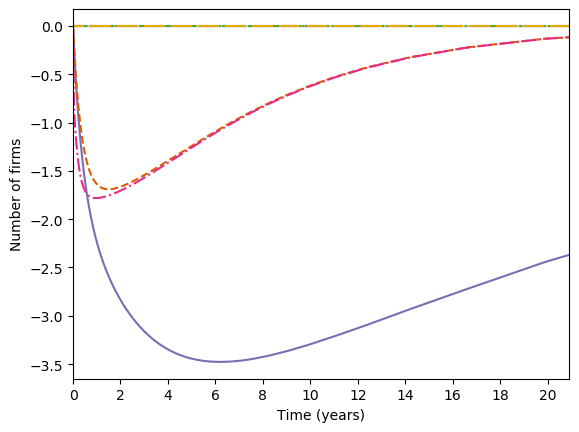

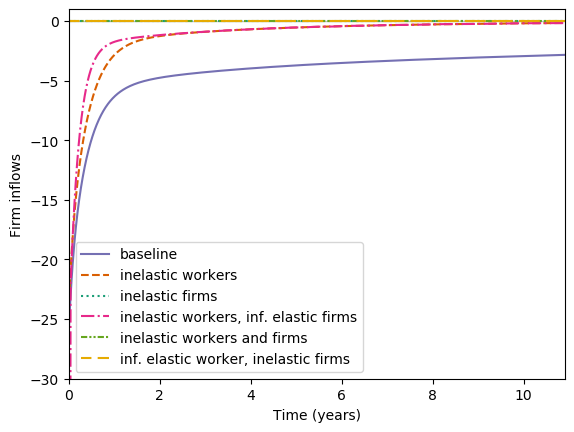

In [3]:
### population
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.d ./myp.d_star .-1) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
ylabel("Population")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks


## flows workers/population
figure()
steadyvalue = p.Phi_star 
plot([0,30], fill(0, 2), c=mygrey, lw=1, label="")
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.d_in ./ myp.Phi_star  .- 1) .* 100  , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
legend()
ax = gca()
ax.set(xlim=(0,10.9), ylim=(-20,30))
xlabel("Time (years)")
ylabel("Worker migration inflows")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks


### firms
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.n ./ p.n_star  .- 1) .* 100  , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
ylabel("Number of firms")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks


## flows firms
figure()
plot([0,30], fill(0,2), c=mygrey, lw=1, label="")
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.n_in ./ myp.Psi_star   .- 1) .* 100  , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
legend()
ax = gca()
ax.set(xlim=(0,10.9), ylim=(-30,1))
xlabel("Time (years)")
ylabel("Firm inflows")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks

# Now with realistic values

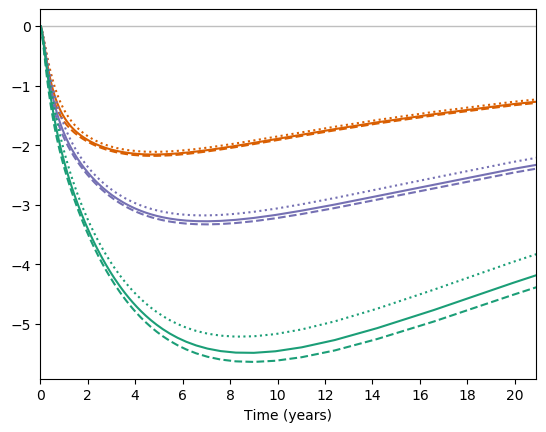

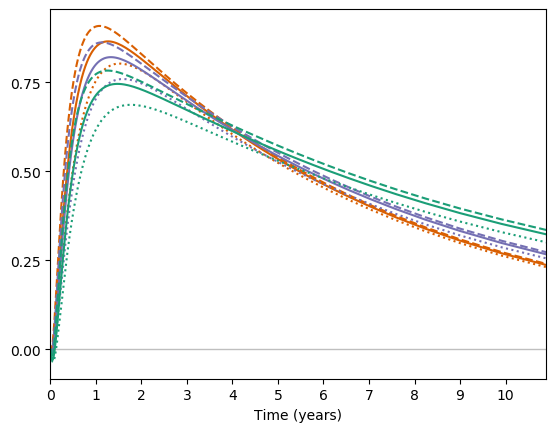

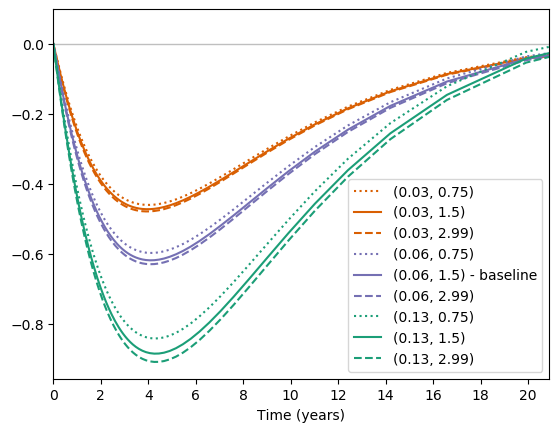

()

In [4]:
tab =[]
cols = [myred, myblue, mygreen]
stys = [":","-","--"]
mycol = []
mysty = []
mylabel = []
for (i,nuPhi) in enumerate([p.nuPhi/2, p.nuPhi, 2*p.nuPhi]), (j,nuPsi) in enumerate([p.nuPsi/2,p.nuPsi, p.nuPsi*2])
    myp = StrucPar_migr(nuPhi, nuPsi, p)
    mysimu = try 
        simulate(240, simpar, myp)
    catch
        simulate(0, simpar, p)
    end
    push!(tab, (myp,mysimu))
    nu1 = round(nuPhi, digits=2)
    nu2 = round(nuPsi, digits=2)
    push!(mycol, cols[i])
    push!(mysty, stys[j])
    if (nuPhi==p.nuPhi) & (nuPsi==p.nuPsi)
        push!(mylabel, "($nu1, $nu2) - baseline")
    else
        push!(mylabel, "($nu1, $nu2)")
    end
end


### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.m ./myp.m_star .- 1) .* 100 , 
             c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(1) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment2.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((myp.l_star-myp.m_star)/(myp.l_star)) ) .* 100 , 
        c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(1) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate2.png")) : ()



### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (myp.l_star/myp.d_star) ) .* 100 ,  
        c=mycol[i], linestyle=mysty[i], label=mylabel[i])
    i +=1
end
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate2.png")) : ()